  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

/tmp/ipython-input-2-3795783369.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2-3795783369.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

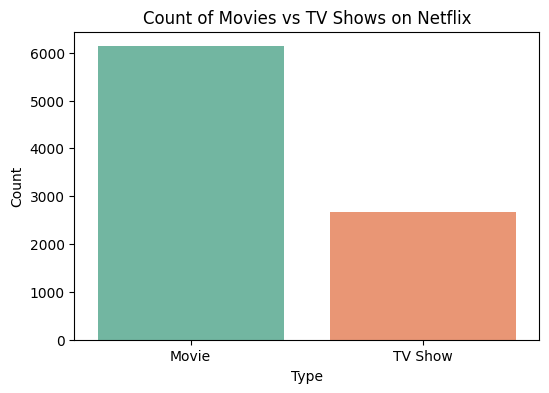

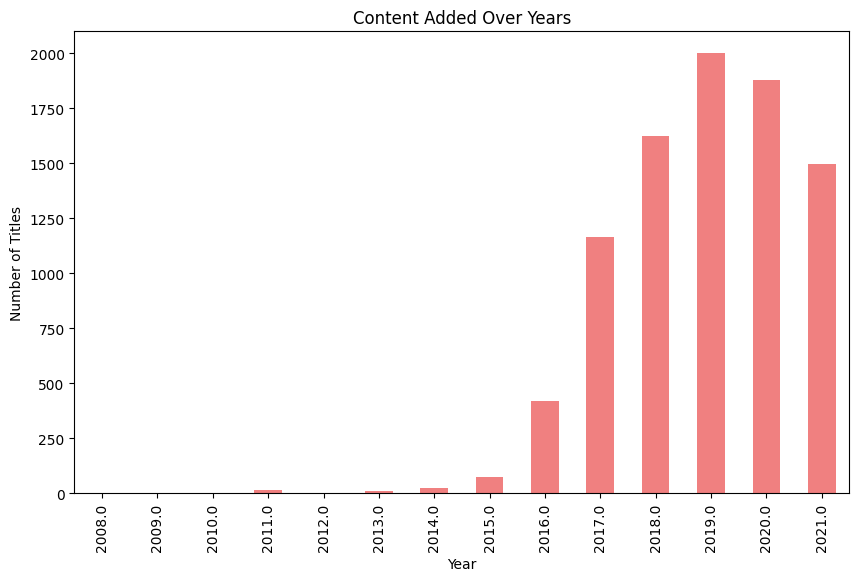

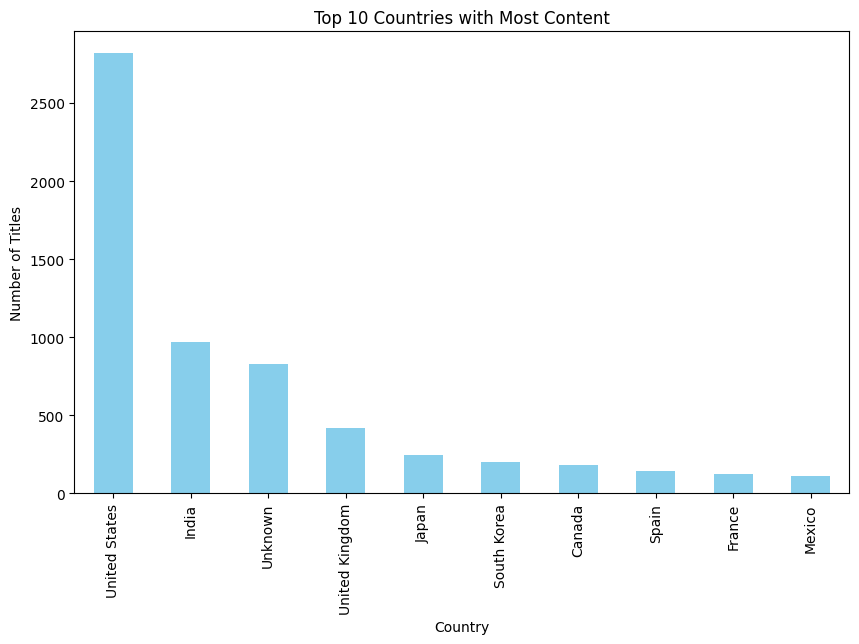

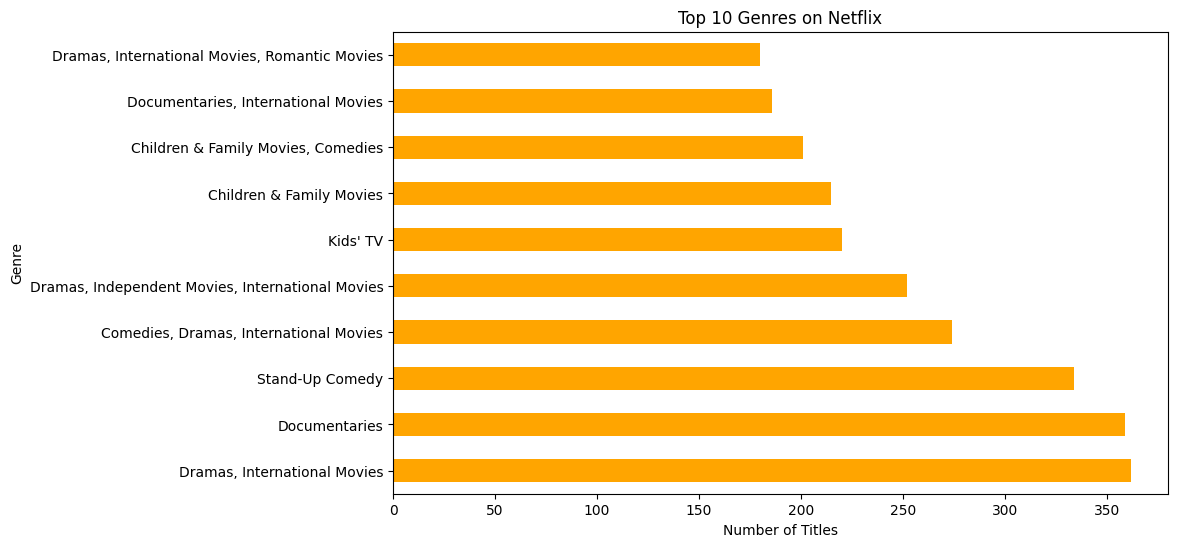

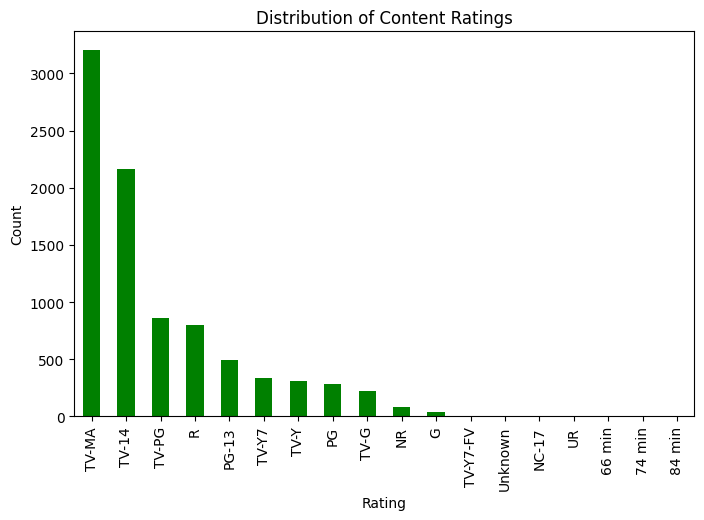

✅ Analysis completed: Netflix has more Movies than TV Shows.
Most content is from the United States, followed by India and UK.
The majority of content was added between 2016-2020.


In [2]:
# 📊 Netflix Data Exploratory Data Analysis

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv('/content/netflix_titles.csv')

# Check first few rows
print(df.head())

# Data Information
print(df.info())

# ✅ Data Cleaning
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Create new columns: Year and Month added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Check for missing values
print(df.isnull().sum())

# Fill missing country, rating, and director with 'Unknown'
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)

# ✅ EDA (Exploratory Data Analysis)

# 1. Count of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# 2. Year-wise content added
plt.figure(figsize=(10,6))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Content Added Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

# 3. Top 10 Countries with Most Content
plt.figure(figsize=(10,6))
df['country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

# 4. Genre Distribution
plt.figure(figsize=(10,6))
df['listed_in'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

# 5. Rating Distribution
plt.figure(figsize=(8,5))
df['rating'].value_counts().plot(kind='bar', color='green')
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# ✅ Conclusion Example:
print("✅ Analysis completed: Netflix has more Movies than TV Shows.")
print("Most content is from the United States, followed by India and UK.")
print("The majority of content was added between 2016-2020.")


# New Section